# Math 134A Week 3

In [19]:
import math
from scipy.optimize import fsolve
import numpy_financial as npf
import pandas as pd

# Computing the present value of a cash flow with interest rate r. 
def PV(r, cf, continuous_compounding = False, dt = None): 
    if dt is None: dt = range(len(cf))
    pv = 0
    if not continuous_compounding:
        for k in range(0, len(cf)):
            pv += cf[k] / (1+r)**dt[k]
    else:
        for k in range(0, len(cf)):
            pv += cf[k] * math.exp(-r * dt[k])
    return pv

# This will return the future value of a cash flow at time T. If T is not specified, then we take T as the time that we receive the last cash flow
def FV(r, cf, continuous_compounding = False, dt = None, T = None):
    if dt is None: dt = range(len(cf))
    if T is None: T = dt[-1]
    fv = 0
    if not continuous_compounding:
        for k in range(0, len(cf)):
            fv += cf[k] * (1+r)**(T - dt[k])
    else:
        for k in range(0, len(cf)):
            fv += cf[k] * math.exp(r * (T - dt[k]))
    return fv   

# Computing the internal rate of return by using the fsolve function to find roots to a polynomial
def irr(cf):
    def simple_npv(r, cf):
        return sum(cf[k]/(1+r)**k for k in range(len(cf)))
    
    result = fsolve(simple_npv, x0 = 0.1, args = cf)
    return result[0]

# Computing the internal rate of return by using the irr function in numpy financial library
def irr2(cf):
    return npf.irr(cf)

## Example of fixed income securities
- **Certificate of Deposit (CD)**
- Government securities: 
  - **U.S. Treasury bills**
  - **U.S. Treasury notes** 
  - **U.S. Treasure bonds**
- **Municipal bonds**
- **Corporate bonds**

## Example of other fixed income investment
- **Annuity**
- **Mortgages**

The above two fixed income investments are usually not considered as a security since they are usually not traded on markets. 

## Annuity
A **perpetual annuity** pays a fixed amount A at the end of every period forever. Its corresponding cash flow is $(0, A, A, A,\ldots)$. Suppose that the prevailing interest per period is $r$. The present value of this annuity is 
$$P = \sum_{k=1}^\infty \frac{A}{(1+r)^k} = A/r$$

In practice, the payment stream for an annuity has a finite lifetime. Suppose that an annuity pays a fixed amount A at the end of every period, and stops after n periodical payments. Let $r$ be the prevailling interest per period. Then the present value of this annuity is 
$$P = \sum_{k=1}^n \frac{A}{(1+r)^k} = \frac{A}{r}\left(1-\frac{1}{(1+r)^n}\right)$$

We also note that the annuity formula can be used in a reverse way to compute the monthly payment to a loan (which is usually called **amortization**). In this case, $P$ and $r$ are given, which are the amount of money we borrowed, and $r$ is the loan rate per period. Then $A$ is the monthly payment to the loan. We can solve that 
$$A = \frac{r(1+r)^nP}{(1+r)^n - 1}$$

In [2]:
def loan_payment(loan_amount, r, n):
    return (loan_amount * r)/(1 - 1/(1+r)**n)

## Example
Suppose you have borrowed 1000 from a credit union. The loan has a yearly interest 12\% compounded monthly. You are to make equal monthly payments to repay the loan over 6 months. How much is the monthly payment?

In [9]:
monthly_payment = loan_payment(1000, 0.01, 6)
print(f"The monthly payment for the loan is {monthly_payment:.2f}")

The monthly payment for the loan is 172.55


In [16]:
import pandas as pd

pd.set_option('float_format', '{:.2f}'.format)
data = pd.DataFrame()
data['Month'] = [1, 2, 3, 4, 5, 6]
previous_balance = [1000]
current_interest = [1000 * 0.01]
payment = [monthly_payment] * 6
net_balance = [1000 * 1.01 - monthly_payment]
for i in range(1, 6):
    previous_balance.append(net_balance[-1])
    current_interest.append(previous_balance[-1] * 0.01)
    net_balance.append(previous_balance[-1] + current_interest[-1] - monthly_payment)
data['previous_balance'] = previous_balance
data['current_interest'] = current_interest
data['payment'] = payment
data['net_balance'] = net_balance
display(data)


,Month,previous_balance,current_interest,payment,net_balance
0,1,1000.00,10.00,172.55,837.45
1,2,837.45,8.37,172.55,673.28
2,3,673.28,6.73,172.55,507.46
3,4,507.46,5.07,172.55,339.99
4,5,339.99,3.40,172.55,170.84
5,6,170.84,1.71,172.55,0.00


## Example
Suppose we borrowed 30000 from a bank with fixed annual interest rate 2\%, compounded monthly, for 30 years, with monthly payment. Compute the monthly payment, and draw a graph showing the ratio of interest and principal paid over each year.

The monthly payment is 110.89


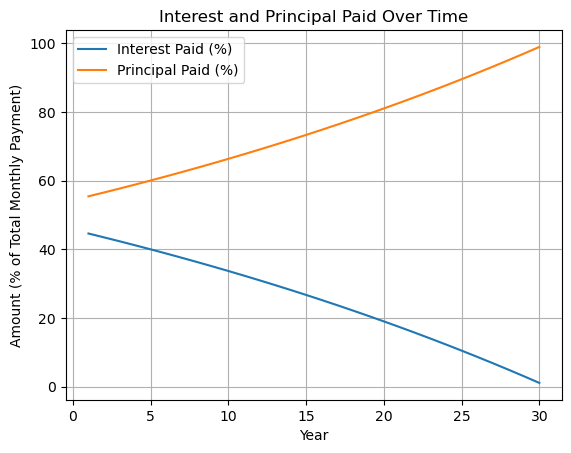

In [45]:
# Plotting percent of interest paid vs principle paid on a loan throughout the loans lifetime
import matplotlib.pyplot as plt
# Loan parameters
loan_amount = 30000
interest_rate = 0.02
loan_term_years = 30
num_payments = loan_term_years * 12
monthly_rate = interest_rate / 12
# Calculate the monthly payment
monthly_payment = loan_payment(loan_amount, monthly_rate, num_payments)
print(f"The monthly payment is {monthly_payment:.2f}")
# Initialize lists for interest, principal, and month number
interest_paid = []
principal_paid = []
year_numbers = [year + 1 for year in range(loan_term_years)]
# Calculate interest and principal payments for each year
remaining_balance = loan_amount
for year in range(loan_term_years):
    annual_interest = 0
    annual_principal = 0
    for month in range(12):
        interest = remaining_balance * monthly_rate
        principal = monthly_payment - interest
        remaining_balance -= principal
        annual_interest += interest
        annual_principal += principal
    interest_paid.append(annual_interest / (12*monthly_payment) * 100)
    principal_paid.append(annual_principal / (12*monthly_payment) * 100)
# Plot the interest and principal paid over time
plt.plot(year_numbers, interest_paid, label='Interest Paid (%)')
plt.plot(year_numbers, principal_paid, label='Principal Paid (%)')
plt.xlabel('Year')
plt.ylabel('Amount (% of Total Monthly Payment)')
plt.title('Interest and Principal Paid Over Time')
plt.legend()
plt.grid()
plt.show()

**Exercise 3.1**: (Amortization) A debt of 25,000 is to be amortized over 7 years at 7\% interest. What value of monthly payments will achieve this? Suppose that the interest is compounded monthly for calculation. 

**Solution**: 

**Exercise 3.2**: (Cycles and annual worth) Given a cash flow stream $X = (x_0,x_1,x_2,...,x_n)$, a new stream $X_\infty$ of infinite length is made by successively repeating the corresponding finite stream. The interest rate is r. Let P and A be the present value and the annual worth, respectively, of stream X. Finally, let $P_\infty$ be the present value of stream $X_\infty$. Find A in terms of $P_\infty$ and conclude that A can be used as well as $P_\infty$ for evaluation purposes.

The **annual worth** of a cash flow $(x_0,\ldots, x_n)$ is the number $A$ such that the cash flow $(0, A,A,\ldots)$ with in total $n$ payments is equivalent to the original cash flow $(x_0,\ldots, x_n)$. 

**Solution**:

**Exercise 3.3**: (Uncertain annuity ) Gavin’s grandfather, Mr. Jones, has just turned 90 years old and is applying for a lifetime annuity that will pay 10,000 per year, starting 1 year from now, until he dies. He asks Gavin to analyze it for him. Gavin finds that according to statistical summaries, the chance (probability) that Mr. Jones will die at any particular age is as follows:

| age | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| probability | .07 | .08 | .09 | .10 | .10 | .10 | .10 | .10 | .10 | .07 | .05 | .04 |

Then Gavin (and you) answer the following questions:
(a) What is the life expectancy of Mr. Jones?
(b) What is the present value of an annuity at 8\% interest that has a lifetime equal to Mr. Jones’s life expectancy? (For an annuity of a non-integral number of years, use an averaging method.)
(c) What is the expected present value of the annuity?

**Solution:**

**Exercise 3.5**: (Mortgage restructuring) An investor purchased a small apartment building for 250,000. She made a down payment of 50,000 and financed the balance with a 30-year, fixed-rate mortgage at 12% annual interest, compounded monthly. For exactly 20 years she has made equal-sized monthly payments as required by the terms of the loan. Now she has the opportunity to restructure the mortgage by refinancing the balance. She could borrow the current balance, pay off the original loan, and assume a new loan for the balance. (No points or any other charges are involved in the transaction.) The new loan is a 20-year, fixed-rate loan at 9%, compounded monthly, to be paid in equal monthly installments. Suppose she has a risk-free savings account that pays 5%, compounded monthly. Should she restructure the mortgage?

**Solution**: 

In [40]:
monthly_payment_old = loan_payment(200000, 0.01, 30*12)
print(f"The monthly payment of the first loan is {monthly_payment_old:.2f}")

payment_cf = [0] + [monthly_payment_old] * 20 * 12
payment_pv = PV(0.01, payment_cf)
remaining_amount = FV(0.01, [200000-payment_pv], T= 20 * 12)
print(f"The remaining amount to the first loan at the end of year 20 is {remaining_amount:.2f}")

# Another way to compute the remaining amount is the present value of the remaining payment cashflow at the end of year 20
# cf = [0]+ [monthly_payment_old] * 10 * 12
# print(PV(0.01, cf))

monthly_payment_new = loan_payment(remaining_amount, 0.09/12, 20 * 12)
print(f"The new monthly payment if restruct the loan is {monthly_payment_new:.2f}")

remaining_payment1_cf = [0] + [monthly_payment_old] * 10 * 12
remaining_payment2_cf = [0] + [monthly_payment_new] * 20 * 12
print(f"The present value of the first option at the end of year 20 is {PV(0.05/12, remaining_payment1_cf):.2f}")
print(f"The present value of the second option at the end of year 20 is {PV(0.05/12, remaining_payment2_cf):2f}")
print("Hence, we choose not to restructure the mortgage")


The monthly payment of the first loan is 2057.23
The remaining amount to the first loan at the end of year 20 is 143389.67
143389.66994755768
The new monthly payment if restruct the loan is 1290.11
The present value of the first option at the end of year 20 is 193957.97
The present value of the second option at the end of year 20 is 195484.939650
Hence, we choose not to restructure the mortgage
